In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dropout, Dense, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_excel("nhl odds 2021-22.xlsx")

In [ ]:
#https://towardsdatascience.com/can-we-beat-the-bookmaker-with-machine-learning-45e3b30fc921
teams = list(set(df['Home'].values)) # creating a list containing every team
n_teams = len(teams) # number of teams
teamToIdx = {t: i for i, t in enumerate(teams)} # our team vocabulary

# assigning the games' home teams their corresponding team id
homeId = [teamToIdx[id] for id in list(df['Home'].values)]
df['Home_Id'] = homeId #creating a new column for the home team id

# assigning the games' Visitors teams their corresponding team id
visitorsId = [teamToIdx[id] for id in list(df['Visitors'].values)]
df['Visitors_Id'] = visitorsId # creating a new row for the away team id

In [ ]:
df.head()

,Date,Home,Home Moneyline,Home Puckline,Home Puckline Odds,Over Under Total,Over,Under,Home Goals,Visitors,Visitors Moneyline,Visitors Puckline,Visitors Puckline Odds,Visitors Goals,Winner,Home_Id,Visitors_Id
0,1012,TampaBay,-140,-1.5,100,6.0,100,-120,2,Pittsburgh,120,1.5,-120,6,0,6,15
1,1012,Vegas,-290,-1.5,110,5.5,-130,110,4,SeattleKraken,235,1.5,-130,3,1,13,16
2,1013,Washington,-135,-1.5,205,6.0,100,-120,5,NYRangers,115,1.5,-235,1,1,10,23
3,1013,Toronto,-190,-1.5,125,5.5,100,-120,2,Montreal,160,1.5,-145,1,1,0,20
4,1013,Edmonton,-180,-1.5,115,6.5,-120,100,3,Vancouver,150,1.5,-135,2,1,8,21


In [ ]:
X = df.drop(columns=['Winner','Home','Visitors',"Date", "Home Goals", "Visitors Goals"])
Y = df['Winner']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.3, shuffle=False)

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.20))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(2))

regressor.compile(optimizer = 'adam', loss = 'binary_crossentropy')



In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 11, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 11, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 11, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 11, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 11, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 11, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

In [ ]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data=(X_val,y_val))

Epoch 1/100
21/21 [==============================] - 12s 83ms/step - loss: 1.1420 - val_loss: 0.7423
Epoch 2/100
21/21 [==============================] - 0s 11ms/step - loss: 0.7275 - val_loss: 0.6937
Epoch 3/100
21/21 [==============================] - 0s 10ms/step - loss: 0.6946 - val_loss: 0.6943
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 0.6878 - val_loss: 0.6858
Epoch 5/100
21/21 [==============================] - 0s 10ms/step - loss: 0.6733 - val_loss: 0.7056
Epoch 6/100
21/21 [==============================] - 0s 11ms/step - loss: 0.6681 - val_loss: 0.6925
Epoch 7/100
21/21 [==============================] - 0s 11ms/step - loss: 0.6787 - val_loss: 0.6842
Epoch 8/100
21/21 [==============================] - 0s 11ms/step - loss: 0.6752 - val_loss: 0.6855
Epoch 9/100
21/21 [==============================] - 0s 10ms/step - loss: 0.6593 - val_loss: 0.6925
Epoch 10/100
21/21 [==============================] - 0s 10ms/step - loss: 0.6679 - val_loss: 0.684

In [ ]:
prediction = regressor.predict(X_test)


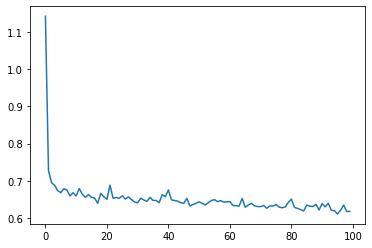

In [ ]:
plt.plot(history.history['loss'])

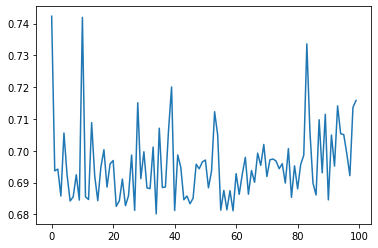

In [ ]:
plt.plot(history.history['val_loss'])

In [ ]:
values = []
for i in range(len(prediction[:,0])):
  if prediction[i,0] < prediction[i,1]:
    values.append(0)
  else:
    values.append(1)


In [ ]:
accuracy_score(y_test, values)

0.6468085106382979

# Predict outcome of future games:

In [ ]:
today=pd.read_excel('20220421.xlsx')

#https://towardsdatascience.com/can-we-beat-the-bookmaker-with-machine-learning-45e3b30fc921


# assigning the games' home teams their corresponding team id
homeId = [teamToIdx[id] for id in list(today['Home'].values)]
today['Home_Id'] = homeId #creating a new column for the home team id

# assigning the games' Visitors teams their corresponding team id
visitorsId = [teamToIdx[id] for id in list(today['Visitors'].values)]
today['Visitors_Id'] = visitorsId # creating a new row for the away team id

In [ ]:
X = today.drop(columns=['Home','Visitors',"Date", "Home Goals", "Visitors Goals"])
prediction = regressor.predict(X)

values = []
for i in range(len(prediction[:,0])):
  if prediction[i,0] < prediction[i,1]:
    values.append(0)
  else:
    values.append(1)

In [ ]:
pd.DataFrame(values).to_csv("file.csv")